<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/scratch_logisticRegression_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習スクラッチ　ロジスティック回帰

In [ ]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    rambda_val : int
      λ
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """

    # 【問題1】仮定関数
    def _logistic_hypothesis(self, X, theta):  #シグモイド関数で学習用データを計算し、Yhatを算出する。
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        """
        
        Yhat = 1 / (1 + math.e ** (-1 * np.dot(X, theta)))
        return Yhat

    # 【問題2】最急降下法
    def _gradient_descent(self, X, y, Yhat, theta):
        """
        説明を記述
        """
        error = Yhat - y
        Xerror = X * error

        if self.bias:
            theta[0] = theta[0] - np.sum(Xerror[:,0], axis=0) / Xerror.shape[0]
            for i in range(1, Xerror.shape[1]):
                tmp = theta[i]
                theta_i = tmp * (self.lambda_val / Xerror.shape[0])
                theta_i += np.sum(Xerror[:,i], axis=0) / Xerror.shape[0]
                theta_i *= self.lr
                theta[i] = tmp - theta_i
            theta = theta.reshape(-1,1)
        else:
            for i in range(0, Xerror.shape[1]):
                tmp = theta[i]
                theta_i = tmp * (self.lambda_val / Xerror.shape[0])
                theta_i += np.sum(Xerror[:,i], axis=0) / Xerror.shape[0]
                theta_i *= self.lr
                theta[i] = tmp - theta_i
            theta = theta.reshape(-1,1)

        return theta

    # 【問題4】目的関数
    def _log_loss(self, y, yhat, theta):
        
        return np.mean((-y * np.log(yhat)) - (1-y) * np.log(1-yhat)) + np.mean((self.lambda_val / 2) * (theta**2))

    # 【問題4】目的関数
    def _log_val_loss(self, y_val, yhat_val,theta_val):

        return np.mean((-y_val * np.log(yhat_val)) - (1-y_val) * np.log(1-yhat_val)) + np.mean((self.lambda_val / 2) * \
                                                                                               (theta_val**2))

    # 【問題6】学習曲線のプロット
    def _log_los_scatter(self, loss, val_loss):
        
        plt.title("Curve of study")
        plt.xlabel("iteration")
        plt.ylabel("Objective Function")
        plt.plot(loss, label="train")
        plt.plot(val_loss, label="val")
        plt.legend()
        plt.show()

    # 【問題8】（アドバンス課題）重みの保存
    def _pickle_save(self):
        myfile = open('mydata_coef.pickle', 'wb')
        pickle.dump(self.coef_, myfile)
        myfile.close()
        
    def __init__(self, num_iter, lr, lambda_val, bias=True, verbose=True):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.lambda_val = lambda_val
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.coef_ = np.array([])
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    # 【問題5】学習と推定
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        #学習用データの計算
        self.theta = np.random.rand(X.shape[1]).reshape(X.shape[1],1)
        #self.theta = np.array([[0.65367757, 0.28025792, 0.13016522, 0.42318881]]).reshape(-1,1)
        
        if self.bias:
            self.theta = np.insert(self.theta, 0, np.random.rand(1)).reshape(-1,1)
            X = np.insert(X, 0, 1, axis=1)

        for i in range(self.iter) :
            #問題１：仮定関数（シグモイド関数）で学習用データを計算し、Yhatを算出する。
            Yhat = self._logistic_hypothesis(X, self.theta)
            Yhat = Yhat.reshape(-1,1)
            
            # 再急降下法の計算を行い、thetaを更新する。
            self.theta = self._gradient_descent(X, y, Yhat, self.theta)
            #verboseをTrueにした際は学習過程を出力
            if self.verbose:
                self.loss[i] = self._log_loss(y, Yhat, self.theta)
                print("{}回目：,log.loss={}".format(i+1, self.loss[i]))

        self.coef_ = self.theta.reshape(self.theta.shape[0], 1)
        # 【問題8】（アドバンス課題）重みの保存
        self._pickle_save()

        #検証用データの計算
        self.theta_val = np.random.rand(X_val.shape[1]).reshape(X_val.shape[1],1)
        #self.theta_val = np.array([[0.65367757, 0.28025792, 0.13016522, 0.42318881]]).reshape(-1,1)
        if X_val is not None:

            if self.bias:
                self.theta_val = np.insert(self.theta_val, 0, np.random.rand(1)).reshape(-1,1)
                X_val = np.insert(X_val, 0, 1, axis=1)
        
            for i in range(self.iter) :
                Yhat_val = self._logistic_hypothesis(X_val, self.theta_val)
                Yhat_val = Yhat_val.reshape(-1,1)
                
                # 再急降下法の計算を行い、thetaを更新する。
                self.theta_val = self._gradient_descent(X_val, y_val, Yhat_val, self.theta_val)

                #verboseをTrueにした際は学習過程を出力
                if self.verbose:
                    self.val_loss[i] = self._log_val_loss(y_val, Yhat_val, self.theta_val)
                    print("{}回目：log.val_loss={}".format(i+1, self._log_loss(y_val, Yhat_val, self.theta_val), \
                                                                     self.val_loss[i]))   

        self._log_los_scatter(self.loss, self.val_loss)
        

    # 【問題3】推定
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        self.judges = np.where(self.predict_proba(X) < 0.5, 0, 1)
        return self.judges
        
    # 【問題3】推定
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        self.Yhat = 1 / (1 + math.e ** (np.dot(X, self.coef_)))
        return self.Yhat
    

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
#X = pd.DataFrame(data = data.data[50:150,0:4], columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X = pd.DataFrame(data = data.data[50:150,0:2], columns= ['sepal_length', 'sepal_width'])
y = pd.DataFrame(data = data.target[50:150],columns=['spacies'])
y.loc[y['spacies'] == 1] = 0
y.loc[y['spacies'] == 2] = 1

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

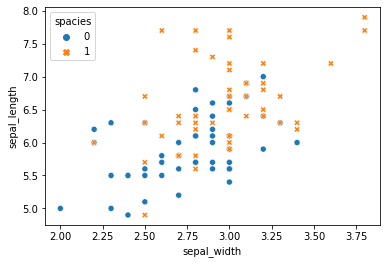

In [ ]:
# 【問題7】決定領域の可視化
df = pd.concat([X, y], axis=1)
sns.scatterplot(x='sepal_width', y='sepal_length', hue="spacies", data=df, style="spacies")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
df = np.array(df)

In [ ]:
lr = ScratchLogisticRegression(num_iter=10000, lr=0.001, lambda_val=0.01, bias=False)

1回目：,log.loss=2.4626437456732058
2回目：,log.loss=2.4528885399283227
3回目：,log.loss=2.4431379739511216
4回目：,log.loss=2.433392141787241
5回目：,log.loss=2.4236511393373905
6回目：,log.loss=2.4139150643904643
7回目：,log.loss=2.4041840166570476
8回目：,log.loss=2.3944580978033794
9回目：,log.loss=2.3847374114857565
10回目：,log.loss=2.375022063385323
11回目：,log.loss=2.3653121612432964
12回目：,log.loss=2.355607814896629
13回目：,log.loss=2.345909136314052
14回目：,log.loss=2.3362162396325465
15回目：,log.loss=2.3265292411942107
16回目：,log.loss=2.316848259583511
17回目：,log.loss=2.307173415664933
18回目：,log.loss=2.297504832621032
19回目：,log.loss=2.287842635990804
20回目：,log.loss=2.278186953708462
21回目：,log.loss=2.268537916142563
22回目：,log.loss=2.2588956561354623
23回目：,log.loss=2.2492603090430974
24回目：,log.loss=2.2396320127751124
25回目：,log.loss=2.230010907835257
26回目：,log.loss=2.220397137362107
27回目：,log.loss=2.2107908471700375
28回目：,log.loss=2.201192185790475
29回目：,log.loss=2.191601304513364
30回目：,log.loss=2.182018357428878
31回目

894回目：,log.loss=0.7034032005721262
895回目：,log.loss=0.703401375817482
896回目：,log.loss=0.7033995511458563
897回目：,log.loss=0.703397726557017
898回目：,log.loss=0.7033959020507365
899回目：,log.loss=0.7033940776267935
900回目：,log.loss=0.7033922532849709
901回目：,log.loss=0.7033904290250572
902回目：,log.loss=0.7033886048468448
903回目：,log.loss=0.7033867807501323
904回目：,log.loss=0.7033849567347216
905回目：,log.loss=0.7033831328004202
906回目：,log.loss=0.703381308947039
907回目：,log.loss=0.7033794851743942
908回目：,log.loss=0.7033776614823053
909回目：,log.loss=0.7033758378705968
910回目：,log.loss=0.7033740143390965
911回目：,log.loss=0.7033721908876367
912回目：,log.loss=0.7033703675160526
913回目：,log.loss=0.7033685442241849
914回目：,log.loss=0.7033667210118757
915回目：,log.loss=0.7033648978789729
916回目：,log.loss=0.7033630748253259
917回目：,log.loss=0.7033612518507888
918回目：,log.loss=0.7033594289552186
919回目：,log.loss=0.7033576061384758
920回目：,log.loss=0.7033557834004235
921回目：,log.loss=0.7033539607409286
922回目：,log.loss=0.70335

1669回目：,log.loss=0.7020110193987552
1670回目：,log.loss=0.7020092508324987
1671回目：,log.loss=0.7020074823371273
1672回目：,log.loss=0.7020057139126384
1673回目：,log.loss=0.7020039455590291
1674回目：,log.loss=0.7020021772762975
1675回目：,log.loss=0.7020004090644404
1676回目：,log.loss=0.7019986409234557
1677回目：,log.loss=0.70199687285334
1678回目：,log.loss=0.7019951048540913
1679回目：,log.loss=0.7019933369257069
1680回目：,log.loss=0.7019915690681839
1681回目：,log.loss=0.7019898012815201
1682回目：,log.loss=0.7019880335657126
1683回目：,log.loss=0.7019862659207589
1684回目：,log.loss=0.7019844983466562
1685回目：,log.loss=0.7019827308434019
1686回目：,log.loss=0.7019809634109939
1687回目：,log.loss=0.7019791960494289
1688回目：,log.loss=0.7019774287587048
1689回目：,log.loss=0.701975661538819
1690回目：,log.loss=0.7019738943897683
1691回目：,log.loss=0.7019721273115503
1692回目：,log.loss=0.7019703603041628
1693回目：,log.loss=0.701968593367603
1694回目：,log.loss=0.7019668265018679
1695回目：,log.loss=0.7019650597069556
1696回目：,log.loss=0.7019632929828

2373回目：,log.loss=0.7007833390644879
2374回目：,log.loss=0.700781619758699
2375回目：,log.loss=0.7007799005219729
2376回目：,log.loss=0.700778181354307
2377回目：,log.loss=0.7007764622556995
2378回目：,log.loss=0.7007747432261469
2379回目：,log.loss=0.7007730242656472
2380回目：,log.loss=0.7007713053741977
2381回目：,log.loss=0.7007695865517959
2382回目：,log.loss=0.7007678677984392
2383回目：,log.loss=0.700766149114125
2384回目：,log.loss=0.7007644304988506
2385回目：,log.loss=0.7007627119526136
2386回目：,log.loss=0.7007609934754115
2387回目：,log.loss=0.7007592750672416
2388回目：,log.loss=0.7007575567281015
2389回目：,log.loss=0.7007558384579887
2390回目：,log.loss=0.7007541202569002
2391回目：,log.loss=0.7007524021248338
2392回目：,log.loss=0.700750684061787
2393回目：,log.loss=0.700748966067757
2394回目：,log.loss=0.7007472481427413
2395回目：,log.loss=0.7007455302867373
2396回目：,log.loss=0.7007438124997427
2397回目：,log.loss=0.7007420947817546
2398回目：,log.loss=0.7007403771327708
2399回目：,log.loss=0.7007386595527885
2400回目：,log.loss=0.70073694204180

3131回目：,log.loss=0.6994997354573071
3132回目：,log.loss=0.6994980677716689
3133回目：,log.loss=0.6994964001531728
3134回目：,log.loss=0.6994947326018173
3135回目：,log.loss=0.699493065117599
3136回目：,log.loss=0.6994913977005156
3137回目：,log.loss=0.6994897303505649
3138回目：,log.loss=0.6994880630677442
3139回目：,log.loss=0.6994863958520511
3140回目：,log.loss=0.699484728703483
3141回目：,log.loss=0.699483061622037
3142回目：,log.loss=0.6994813946077112
3143回目：,log.loss=0.6994797276605029
3144回目：,log.loss=0.6994780607804096
3145回目：,log.loss=0.6994763939674291
3146回目：,log.loss=0.6994747272215579
3147回目：,log.loss=0.6994730605427948
3148回目：,log.loss=0.6994713939311366
3149回目：,log.loss=0.6994697273865806
3150回目：,log.loss=0.6994680609091244
3151回目：,log.loss=0.699466394498766
3152回目：,log.loss=0.6994647281555023
3153回目：,log.loss=0.6994630618793313
3154回目：,log.loss=0.69946139567025
3155回目：,log.loss=0.6994597295282562
3156回目：,log.loss=0.6994580634533475
3157回目：,log.loss=0.6994563974455211
3158回目：,log.loss=0.699454731504774

3659回目：,log.loss=0.698628477972602
3660回目：,log.loss=0.698626845391488
3661回目：,log.loss=0.698625212876204
3662回目：,log.loss=0.6986235804267478
3663回目：,log.loss=0.6986219480431171
3664回目：,log.loss=0.6986203157253086
3665回目：,log.loss=0.6986186834733205
3666回目：,log.loss=0.6986170512871502
3667回目：,log.loss=0.6986154191667954
3668回目：,log.loss=0.6986137871122533
3669回目：,log.loss=0.6986121551235218
3670回目：,log.loss=0.6986105232005981
3671回目：,log.loss=0.69860889134348
3672回目：,log.loss=0.6986072595521647
3673回目：,log.loss=0.69860562782665
3674回目：,log.loss=0.6986039961669336
3675回目：,log.loss=0.6986023645730126
3676回目：,log.loss=0.6986007330448847
3677回目：,log.loss=0.6985991015825476
3678回目：,log.loss=0.6985974701859986
3679回目：,log.loss=0.6985958388552356
3680回目：,log.loss=0.6985942075902557
3681回目：,log.loss=0.6985925763910567
3682回目：,log.loss=0.6985909452576361
3683回目：,log.loss=0.6985893141899912
3684回目：,log.loss=0.6985876831881198
3685回目：,log.loss=0.6985860522520194
3686回目：,log.loss=0.6985844213816874

4232回目：,log.loss=0.6977037205202847
4233回目：,log.loss=0.6977021252580519
4234回目：,log.loss=0.6977005300602478
4235回目：,log.loss=0.6976989349268712
4236回目：,log.loss=0.6976973398579189
4237回目：,log.loss=0.6976957448533887
4238回目：,log.loss=0.6976941499132782
4239回目：,log.loss=0.697692555037585
4240回目：,log.loss=0.6976909602263066
4241回目：,log.loss=0.6976893654794406
4242回目：,log.loss=0.6976877707969849
4243回目：,log.loss=0.6976861761789362
4244回目：,log.loss=0.6976845816252932
4245回目：,log.loss=0.6976829871360525
4246回目：,log.loss=0.6976813927112122
4247回目：,log.loss=0.69767979835077
4248回目：,log.loss=0.6976782040547231
4249回目：,log.loss=0.697676609823069
4250回目：,log.loss=0.6976750156558059
4251回目：,log.loss=0.6976734215529308
4252回目：,log.loss=0.6976718275144413
4253回目：,log.loss=0.6976702335403356
4254回目：,log.loss=0.6976686396306104
4255回目：,log.loss=0.6976670457852641
4256回目：,log.loss=0.6976654520042936
4257回目：,log.loss=0.6976638582876968
4258回目：,log.loss=0.6976622646354713
4259回目：,log.loss=0.6976606710476

5008回目：,log.loss=0.6964849840587403
5009回目：,log.loss=0.6964834380707996
5010回目：,log.loss=0.6964818921454304
5011回目：,log.loss=0.6964803462826298
5012回目：,log.loss=0.6964788004823961
5013回目：,log.loss=0.6964772547447265
5014回目：,log.loss=0.6964757090696184
5015回目：,log.loss=0.69647416345707
5016回目：,log.loss=0.6964726179070787
5017回目：,log.loss=0.6964710724196421
5018回目：,log.loss=0.6964695269947577
5019回目：,log.loss=0.6964679816324235
5020回目：,log.loss=0.6964664363326367
5021回目：,log.loss=0.6964648910953954
5022回目：,log.loss=0.6964633459206968
5023回目：,log.loss=0.6964618008085388
5024回目：,log.loss=0.6964602557589191
5025回目：,log.loss=0.696458710771835
5026回目：,log.loss=0.6964571658472846
5027回目：,log.loss=0.6964556209852649
5028回目：,log.loss=0.6964540761857743
5029回目：,log.loss=0.6964525314488096
5030回目：,log.loss=0.6964509867743692
5031回目：,log.loss=0.6964494421624504
5032回目：,log.loss=0.6964478976130506
5033回目：,log.loss=0.6964463531261681
5034回目：,log.loss=0.6964448087017997
5035回目：,log.loss=0.696443264339

5654回目：,log.loss=0.695499206369545
5655回目：,log.loss=0.6954977003131072
5656回目：,log.loss=0.6954961943177278
5657回目：,log.loss=0.6954946883834046
5658回目：,log.loss=0.6954931825101351
5659回目：,log.loss=0.6954916766979173
5660回目：,log.loss=0.6954901709467486
5661回目：,log.loss=0.6954886652566267
5662回目：,log.loss=0.6954871596275495
5663回目：,log.loss=0.6954856540595142
5664回目：,log.loss=0.695484148552519
5665回目：,log.loss=0.6954826431065616
5666回目：,log.loss=0.6954811377216397
5667回目：,log.loss=0.6954796323977503
5668回目：,log.loss=0.6954781271348915
5669回目：,log.loss=0.6954766219330614
5670回目：,log.loss=0.6954751167922573
5671回目：,log.loss=0.6954736117124763
5672回目：,log.loss=0.6954721066937172
5673回目：,log.loss=0.6954706017359773
5674回目：,log.loss=0.6954690968392537
5675回目：,log.loss=0.6954675920035448
5676回目：,log.loss=0.6954660872288481
5677回目：,log.loss=0.695464582515161
5678回目：,log.loss=0.6954630778624815
5679回目：,log.loss=0.6954615732708072
5680回目：,log.loss=0.6954600687401357
5681回目：,log.loss=0.695458564270

6370回目：,log.loss=0.6944363586811062
6371回目：,log.loss=0.6944348957536783
6372回目：,log.loss=0.694433432885668
6373回目：,log.loss=0.6944319700770729
6374回目：,log.loss=0.6944305073278911
6375回目：,log.loss=0.69442904463812
6376回目：,log.loss=0.6944275820077576
6377回目：,log.loss=0.6944261194368012
6378回目：,log.loss=0.6944246569252491
6379回目：,log.loss=0.6944231944730985
6380回目：,log.loss=0.6944217320803476
6381回目：,log.loss=0.6944202697469938
6382回目：,log.loss=0.6944188074730351
6383回目：,log.loss=0.6944173452584689
6384回目：,log.loss=0.6944158831032933
6385回目：,log.loss=0.6944144210075057
6386回目：,log.loss=0.6944129589711042
6387回目：,log.loss=0.6944114969940861
6388回目：,log.loss=0.6944100350764496
6389回目：,log.loss=0.6944085732181922
6390回目：,log.loss=0.6944071114193114
6391回目：,log.loss=0.6944056496798056
6392回目：,log.loss=0.6944041879996717
6393回目：,log.loss=0.6944027263789082
6394回目：,log.loss=0.6944012648175123
6395回目：,log.loss=0.6943998033154819
6396回目：,log.loss=0.6943983418728149
6397回目：,log.loss=0.694396880489

6986回目：,log.loss=0.6935463628783264
6987回目：,log.loss=0.6935449361258647
6988回目：,log.loss=0.6935435094314387
6989回目：,log.loss=0.6935420827950464
6990回目：,log.loss=0.6935406562166856
6991回目：,log.loss=0.6935392296963541
6992回目：,log.loss=0.6935378032340498
6993回目：,log.loss=0.6935363768297702
6994回目：,log.loss=0.693534950483513
6995回目：,log.loss=0.6935335241952765
6996回目：,log.loss=0.693532097965058
6997回目：,log.loss=0.6935306717928557
6998回目：,log.loss=0.6935292456786669
6999回目：,log.loss=0.6935278196224898
7000回目：,log.loss=0.6935263936243219
7001回目：,log.loss=0.693524967684161
7002回目：,log.loss=0.6935235418020049
7003回目：,log.loss=0.6935221159778518
7004回目：,log.loss=0.6935206902116989
7005回目：,log.loss=0.6935192645035442
7006回目：,log.loss=0.6935178388533858
7007回目：,log.loss=0.6935164132612207
7008回目：,log.loss=0.6935149877270473
7009回目：,log.loss=0.693513562250863
7010回目：,log.loss=0.6935121368326663
7011回目：,log.loss=0.6935107114724541
7012回目：,log.loss=0.6935092861702247
7013回目：,log.loss=0.6935078609259

7618回目：,log.loss=0.6926561349541364
7619回目：,log.loss=0.692654744440661
7620回目：,log.loss=0.6926533539838329
7621回目：,log.loss=0.6926519635836496
7622回目：,log.loss=0.6926505732401089
7623回目：,log.loss=0.6926491829532087
7624回目：,log.loss=0.6926477927229467
7625回目：,log.loss=0.6926464025493209
7626回目：,log.loss=0.692645012432329
7627回目：,log.loss=0.6926436223719691
7628回目：,log.loss=0.6926422323682386
7629回目：,log.loss=0.6926408424211358
7630回目：,log.loss=0.6926394525306582
7631回目：,log.loss=0.6926380626968036
7632回目：,log.loss=0.6926366729195699
7633回目：,log.loss=0.692635283198955
7634回目：,log.loss=0.6926338935349565
7635回目：,log.loss=0.6926325039275727
7636回目：,log.loss=0.6926311143768009
7637回目：,log.loss=0.6926297248826394
7638回目：,log.loss=0.6926283354450855
7639回目：,log.loss=0.6926269460641374
7640回目：,log.loss=0.692625556739793
7641回目：,log.loss=0.6926241674720496
7642回目：,log.loss=0.6926227782609058
7643回目：,log.loss=0.6926213891063585
7644回目：,log.loss=0.6926200000084064
7645回目：,log.loss=0.6926186109670

8444回目：,log.loss=0.6915266697290887
8445回目：,log.loss=0.6915253252717537
8446回目：,log.loss=0.6915239808692938
8447回目：,log.loss=0.6915226365217065
8448回目：,log.loss=0.6915212922289902
8449回目：,log.loss=0.6915199479911425
8450回目：,log.loss=0.6915186038081615
8451回目：,log.loss=0.691517259680045
8452回目：,log.loss=0.6915159156067908
8453回目：,log.loss=0.691514571588397
8454回目：,log.loss=0.6915132276248612
8455回目：,log.loss=0.6915118837161816
8456回目：,log.loss=0.6915105398623557
8457回目：,log.loss=0.6915091960633816
8458回目：,log.loss=0.6915078523192572
8459回目：,log.loss=0.6915065086299805
8460回目：,log.loss=0.6915051649955491
8461回目：,log.loss=0.6915038214159612
8462回目：,log.loss=0.6915024778912142
8463回目：,log.loss=0.6915011344213065
8464回目：,log.loss=0.6914997910062359
8465回目：,log.loss=0.691498447646
8466回目：,log.loss=0.6914971043405969
8467回目：,log.loss=0.6914957610900246
8468回目：,log.loss=0.6914944178942808
8469回目：,log.loss=0.6914930747533632
8470回目：,log.loss=0.6914917316672701
8471回目：,log.loss=0.691490388635999

9116回目：,log.loss=0.6906354603813227
9117回目：,log.loss=0.6906341523266099
9118回目：,log.loss=0.6906328443253661
9119回目：,log.loss=0.69063153637759
9120回目：,log.loss=0.6906302284832786
9121回目：,log.loss=0.6906289206424305
9122回目：,log.loss=0.6906276128550435
9123回目：,log.loss=0.6906263051211154
9124回目：,log.loss=0.6906249974406443
9125回目：,log.loss=0.6906236898136279
9126回目：,log.loss=0.6906223822400646
9127回目：,log.loss=0.6906210747199515
9128回目：,log.loss=0.6906197672532874
9129回目：,log.loss=0.6906184598400696
9130回目：,log.loss=0.6906171524802963
9131回目：,log.loss=0.6906158451739658
9132回目：,log.loss=0.6906145379210755
9133回目：,log.loss=0.6906132307216234
9134回目：,log.loss=0.6906119235756075
9135回目：,log.loss=0.6906106164830258
9136回目：,log.loss=0.6906093094438763
9137回目：,log.loss=0.6906080024581568
9138回目：,log.loss=0.6906066955258653
9139回目：,log.loss=0.6906053886469994
9140回目：,log.loss=0.6906040818215576
9141回目：,log.loss=0.6906027750495375
9142回目：,log.loss=0.690601468330937
9143回目：,log.loss=0.690600161665

9663回目：,log.loss=0.6899278832335881
9664回目：,log.loss=0.6899266041196601
9665回目：,log.loss=0.6899253250580808
9666回目：,log.loss=0.6899240460488477
9667回目：,log.loss=0.6899227670919592
9668回目：,log.loss=0.6899214881874133
9669回目：,log.loss=0.6899202093352074
9670回目：,log.loss=0.6899189305353403
9671回目：,log.loss=0.6899176517878094
9672回目：,log.loss=0.6899163730926129
9673回目：,log.loss=0.6899150944497484
9674回目：,log.loss=0.6899138158592145
9675回目：,log.loss=0.6899125373210088
9676回目：,log.loss=0.689911258835129
9677回目：,log.loss=0.6899099804015737
9678回目：,log.loss=0.6899087020203404
9679回目：,log.loss=0.6899074236914273
9680回目：,log.loss=0.6899061454148322
9681回目：,log.loss=0.6899048671905532
9682回目：,log.loss=0.6899035890185883
9683回目：,log.loss=0.6899023108989353
9684回目：,log.loss=0.6899010328315924
9685回目：,log.loss=0.6898997548165574
9686回目：,log.loss=0.6898984768538283
9687回目：,log.loss=0.6898971989434031
9688回目：,log.loss=0.6898959210852796
9689回目：,log.loss=0.6898946432794563
9690回目：,log.loss=0.6898933655

284回目：log.val_loss=0.7452524071454997
285回目：log.val_loss=0.7439776352235762
286回目：log.val_loss=0.7427301145418521
287回目：log.val_loss=0.7415093155075134
288回目：log.val_loss=0.7403147164098374
289回目：log.val_loss=0.739145803412379
290回目：log.val_loss=0.7380020705393486
291回目：log.val_loss=0.7368830196564597
292回目：log.val_loss=0.7357881604465171
293回目：log.val_loss=0.7347170103800099
294回目：log.val_loss=0.7336690946809695
295回目：log.val_loss=0.732643946288347
296回目：log.val_loss=0.7316411058131519
297回目：log.val_loss=0.7306601214915995
298回目：log.val_loss=0.7297005491344953
299回目：log.val_loss=0.7287619520730885
300回目：log.val_loss=0.7278439011016087
301回目：log.val_loss=0.7269459744167086
302回目：log.val_loss=0.7260677575540118
303回目：log.val_loss=0.725208843321972
304回目：log.val_loss=0.7243688317332323
305回目：log.val_loss=0.7235473299336781
306回目：log.val_loss=0.7227439521293563
307回目：log.val_loss=0.7219583195114428
308回目：log.val_loss=0.7211900601794184
309回目：log.val_loss=0.7204388090626181
310回目：log.val_l

864回目：log.val_loss=0.6879713559161781
865回目：log.val_loss=0.6879713515262781
866回目：log.val_loss=0.6879713471810585
867回目：log.val_loss=0.6879713428794872
868回目：log.val_loss=0.687971338620557
869回目：log.val_loss=0.6879713344032832
870回目：log.val_loss=0.687971330226704
871回目：log.val_loss=0.6879713260898797
872回目：log.val_loss=0.6879713219918919
873回目：log.val_loss=0.6879713179318443
874回目：log.val_loss=0.6879713139088598
875回目：log.val_loss=0.6879713099220823
876回目：log.val_loss=0.6879713059706759
877回目：log.val_loss=0.6879713020538225
878回目：log.val_loss=0.687971298170724
879回目：log.val_loss=0.6879712943206004
880回目：log.val_loss=0.6879712905026899
881回目：log.val_loss=0.6879712867162472
882回目：log.val_loss=0.6879712829605452
883回目：log.val_loss=0.6879712792348734
884回目：log.val_loss=0.6879712755385371
885回目：log.val_loss=0.6879712718708582
886回目：log.val_loss=0.6879712682311738
887回目：log.val_loss=0.6879712646188368
888回目：log.val_loss=0.6879712610332145
889回目：log.val_loss=0.6879712574736889
890回目：log.val_l

1368回目：log.val_loss=0.687970042031526
1369回目：log.val_loss=0.6879700396293763
1370回目：log.val_loss=0.6879700372274283
1371回目：log.val_loss=0.6879700348256814
1372回目：log.val_loss=0.6879700324241366
1373回目：log.val_loss=0.6879700300227934
1374回目：log.val_loss=0.6879700276216516
1375回目：log.val_loss=0.6879700252207115
1376回目：log.val_loss=0.6879700228199732
1377回目：log.val_loss=0.6879700204194368
1378回目：log.val_loss=0.687970018019102
1379回目：log.val_loss=0.6879700156189693
1380回目：log.val_loss=0.6879700132190381
1381回目：log.val_loss=0.6879700108193091
1382回目：log.val_loss=0.6879700084197817
1383回目：log.val_loss=0.6879700060204564
1384回目：log.val_loss=0.687970003621333
1385回目：log.val_loss=0.687970001222412
1386回目：log.val_loss=0.6879699988236928
1387回目：log.val_loss=0.6879699964251758
1388回目：log.val_loss=0.6879699940268608
1389回目：log.val_loss=0.6879699916287481
1390回目：log.val_loss=0.6879699892308373
1391回目：log.val_loss=0.6879699868331288
1392回目：log.val_loss=0.6879699844356226
1393回目：log.val_loss=0.6879699

1923回目：log.val_loss=0.6879687400738616
1924回目：log.val_loss=0.6879687377843337
1925回目：log.val_loss=0.6879687354950073
1926回目：log.val_loss=0.6879687332058825
1927回目：log.val_loss=0.6879687309169589
1928回目：log.val_loss=0.6879687286282367
1929回目：log.val_loss=0.6879687263397158
1930回目：log.val_loss=0.6879687240513963
1931回目：log.val_loss=0.6879687217632783
1932回目：log.val_loss=0.6879687194753612
1933回目：log.val_loss=0.6879687171876459
1934回目：log.val_loss=0.6879687149001319
1935回目：log.val_loss=0.6879687126128189
1936回目：log.val_loss=0.6879687103257077
1937回目：log.val_loss=0.6879687080387973
1938回目：log.val_loss=0.6879687057520885
1939回目：log.val_loss=0.687968703465581
1940回目：log.val_loss=0.6879687011792746
1941回目：log.val_loss=0.6879686988931696
1942回目：log.val_loss=0.6879686966072657
1943回目：log.val_loss=0.6879686943215634
1944回目：log.val_loss=0.6879686920360621
1945回目：log.val_loss=0.687968689750762
1946回目：log.val_loss=0.6879686874656633
1947回目：log.val_loss=0.6879686851807656
1948回目：log.val_loss=0.68796

2552回目：log.val_loss=0.6879673394121621
2553回目：log.val_loss=0.6879673372477543
2554回目：log.val_loss=0.6879673350835428
2555回目：log.val_loss=0.687967332919528
2556回目：log.val_loss=0.6879673307557093
2557回目：log.val_loss=0.6879673285920872
2558回目：log.val_loss=0.6879673264286615
2559回目：log.val_loss=0.6879673242654322
2560回目：log.val_loss=0.6879673221023994
2561回目：log.val_loss=0.6879673199395628
2562回目：log.val_loss=0.6879673177769227
2563回目：log.val_loss=0.6879673156144788
2564回目：log.val_loss=0.6879673134522315
2565回目：log.val_loss=0.6879673112901804
2566回目：log.val_loss=0.6879673091283256
2567回目：log.val_loss=0.6879673069666673
2568回目：log.val_loss=0.6879673048052054
2569回目：log.val_loss=0.6879673026439396
2570回目：log.val_loss=0.6879673004828702
2571回目：log.val_loss=0.6879672983219971
2572回目：log.val_loss=0.6879672961613202
2573回目：log.val_loss=0.6879672940008399
2574回目：log.val_loss=0.6879672918405555
2575回目：log.val_loss=0.6879672896804675
2576回目：log.val_loss=0.6879672875205759
2577回目：log.val_loss=0.6879

3160回目：log.val_loss=0.6879660594113408
3161回目：log.val_loss=0.687966057364937
3162回目：log.val_loss=0.6879660553187253
3163回目：log.val_loss=0.6879660532727053
3164回目：log.val_loss=0.6879660512268767
3165回目：log.val_loss=0.6879660491812402
3166回目：log.val_loss=0.687966047135795
3167回目：log.val_loss=0.6879660450905417
3168回目：log.val_loss=0.6879660430454801
3169回目：log.val_loss=0.6879660410006104
3170回目：log.val_loss=0.6879660389559321
3171回目：log.val_loss=0.6879660369114456
3172回目：log.val_loss=0.6879660348671506
3173回目：log.val_loss=0.6879660328230474
3174回目：log.val_loss=0.6879660307791358
3175回目：log.val_loss=0.6879660287354158
3176回目：log.val_loss=0.6879660266918877
3177回目：log.val_loss=0.6879660246485507
3178回目：log.val_loss=0.6879660226054057
3179回目：log.val_loss=0.6879660205624524
3180回目：log.val_loss=0.6879660185196904
3181回目：log.val_loss=0.6879660164771202
3182回目：log.val_loss=0.6879660144347416
3183回目：log.val_loss=0.6879660123925545
3184回目：log.val_loss=0.6879660103505588
3185回目：log.val_loss=0.68796

3659回目：log.val_loss=0.6879650619227846
3660回目：log.val_loss=0.6879650599711127
3661回目：log.val_loss=0.687965058019629
3662回目：log.val_loss=0.6879650560683331
3663回目：log.val_loss=0.6879650541172252
3664回目：log.val_loss=0.6879650521663053
3665回目：log.val_loss=0.6879650502155734
3666回目：log.val_loss=0.6879650482650292
3667回目：log.val_loss=0.6879650463146728
3668回目：log.val_loss=0.6879650443645046
3669回目：log.val_loss=0.6879650424145243
3670回目：log.val_loss=0.6879650404647316
3671回目：log.val_loss=0.687965038515127
3672回目：log.val_loss=0.6879650365657103
3673回目：log.val_loss=0.6879650346164813
3674回目：log.val_loss=0.6879650326674402
3675回目：log.val_loss=0.687965030718587
3676回目：log.val_loss=0.6879650287699217
3677回目：log.val_loss=0.687965026821444
3678回目：log.val_loss=0.6879650248731543
3679回目：log.val_loss=0.6879650229250523
3680回目：log.val_loss=0.6879650209771382
3681回目：log.val_loss=0.687965019029412
3682回目：log.val_loss=0.6879650170818734
3683回目：log.val_loss=0.6879650151345225
3684回目：log.val_loss=0.68796501

4176回目：log.val_loss=0.6879640778069243
4177回目：log.val_loss=0.6879640759514252
4178回目：log.val_loss=0.6879640740961098
4179回目：log.val_loss=0.6879640722409788
4180回目：log.val_loss=0.6879640703860316
4181回目：log.val_loss=0.6879640685312687
4182回目：log.val_loss=0.6879640666766899
4183回目：log.val_loss=0.6879640648222951
4184回目：log.val_loss=0.6879640629680843
4185回目：log.val_loss=0.6879640611140573
4186回目：log.val_loss=0.6879640592602148
4187回目：log.val_loss=0.687964057406556
4188回目：log.val_loss=0.6879640555530814
4189回目：log.val_loss=0.6879640536997906
4190回目：log.val_loss=0.6879640518466841
4191回目：log.val_loss=0.6879640499937615
4192回目：log.val_loss=0.6879640481410227
4193回目：log.val_loss=0.687964046288468
4194回目：log.val_loss=0.6879640444360973
4195回目：log.val_loss=0.6879640425839105
4196回目：log.val_loss=0.6879640407319079
4197回目：log.val_loss=0.6879640388800887
4198回目：log.val_loss=0.6879640370284541
4199回目：log.val_loss=0.687964035177003
4200回目：log.val_loss=0.6879640333257361
4201回目：log.val_loss=0.687964

4784回目：log.val_loss=0.687962983359362
4785回目：log.val_loss=0.6879629816144356
4786回目：log.val_loss=0.6879629798696887
4787回目：log.val_loss=0.6879629781251215
4788回目：log.val_loss=0.687962976380734
4789回目：log.val_loss=0.6879629746365263
4790回目：log.val_loss=0.6879629728924977
4791回目：log.val_loss=0.6879629711486495
4792回目：log.val_loss=0.6879629694049803
4793回目：log.val_loss=0.6879629676614908
4794回目：log.val_loss=0.687962965918181
4795回目：log.val_loss=0.6879629641750505
4796回目：log.val_loss=0.6879629624320998
4797回目：log.val_loss=0.6879629606893285
4798回目：log.val_loss=0.6879629589467371
4799回目：log.val_loss=0.6879629572043248
4800回目：log.val_loss=0.6879629554620924
4801回目：log.val_loss=0.6879629537200393
4802回目：log.val_loss=0.687962951978166
4803回目：log.val_loss=0.6879629502364719
4804回目：log.val_loss=0.6879629484949575
4805回目：log.val_loss=0.6879629467536226
4806回目：log.val_loss=0.687962945012467
4807回目：log.val_loss=0.6879629432714912
4808回目：log.val_loss=0.6879629415306947
4809回目：log.val_loss=0.68796293

5428回目：log.val_loss=0.6879618965014528
5429回目：log.val_loss=0.6879618948707259
5430回目：log.val_loss=0.6879618932401741
5431回目：log.val_loss=0.6879618916097973
5432回目：log.val_loss=0.6879618899795952
5433回目：log.val_loss=0.6879618883495684
5434回目：log.val_loss=0.6879618867197167
5435回目：log.val_loss=0.6879618850900399
5436回目：log.val_loss=0.6879618834605378
5437回目：log.val_loss=0.6879618818312109
5438回目：log.val_loss=0.6879618802020591
5439回目：log.val_loss=0.6879618785730822
5440回目：log.val_loss=0.68796187694428
5441回目：log.val_loss=0.687961875315653
5442回目：log.val_loss=0.6879618736872009
5443回目：log.val_loss=0.6879618720589237
5444回目：log.val_loss=0.6879618704308214
5445回目：log.val_loss=0.6879618688028941
5446回目：log.val_loss=0.6879618671751417
5447回目：log.val_loss=0.6879618655475641
5448回目：log.val_loss=0.6879618639201615
5449回目：log.val_loss=0.6879618622929338
5450回目：log.val_loss=0.6879618606658808
5451回目：log.val_loss=0.6879618590390029
5452回目：log.val_loss=0.6879618574122998
5453回目：log.val_loss=0.687961

6036回目：log.val_loss=0.6879609370535574
6037回目：log.val_loss=0.6879609355279461
6038回目：log.val_loss=0.6879609340025056
6039回目：log.val_loss=0.6879609324772361
6040回目：log.val_loss=0.6879609309521372
6041回目：log.val_loss=0.687960929427209
6042回目：log.val_loss=0.6879609279024514
6043回目：log.val_loss=0.6879609263778645
6044回目：log.val_loss=0.6879609248534484
6045回目：log.val_loss=0.6879609233292031
6046回目：log.val_loss=0.6879609218051285
6047回目：log.val_loss=0.6879609202812245
6048回目：log.val_loss=0.6879609187574913
6049回目：log.val_loss=0.6879609172339286
6050回目：log.val_loss=0.6879609157105369
6051回目：log.val_loss=0.6879609141873154
6052回目：log.val_loss=0.687960912664265
6053回目：log.val_loss=0.6879609111413851
6054回目：log.val_loss=0.687960909618676
6055回目：log.val_loss=0.6879609080961373
6056回目：log.val_loss=0.6879609065737692
6057回目：log.val_loss=0.6879609050515719
6058回目：log.val_loss=0.6879609035295451
6059回目：log.val_loss=0.687960902007689
6060回目：log.val_loss=0.6879609004860033
6061回目：log.val_loss=0.6879608

6605回目：log.val_loss=0.6879600963634486
6606回目：log.val_loss=0.6879600949338833
6607回目：log.val_loss=0.6879600935044851
6608回目：log.val_loss=0.6879600920752535
6609回目：log.val_loss=0.6879600906461887
6610回目：log.val_loss=0.6879600892172909
6611回目：log.val_loss=0.6879600877885599
6612回目：log.val_loss=0.6879600863599954
6613回目：log.val_loss=0.687960084931598
6614回目：log.val_loss=0.6879600835033672
6615回目：log.val_loss=0.6879600820753036
6616回目：log.val_loss=0.6879600806474064
6617回目：log.val_loss=0.6879600792196761
6618回目：log.val_loss=0.6879600777921125
6619回目：log.val_loss=0.6879600763647155
6620回目：log.val_loss=0.6879600749374856
6621回目：log.val_loss=0.6879600735104224
6622回目：log.val_loss=0.6879600720835258
6623回目：log.val_loss=0.6879600706567958
6624回目：log.val_loss=0.6879600692302329
6625回目：log.val_loss=0.6879600678038365
6626回目：log.val_loss=0.6879600663776066
6627回目：log.val_loss=0.6879600649515437
6628回目：log.val_loss=0.6879600635256475
6629回目：log.val_loss=0.6879600620999181
6630回目：log.val_loss=0.6879

7169回目：log.val_loss=0.6879593163760477
7170回目：log.val_loss=0.6879593150395072
7171回目：log.val_loss=0.6879593137031299
7172回目：log.val_loss=0.6879593123669155
7173回目：log.val_loss=0.6879593110308645
7174回目：log.val_loss=0.6879593096949761
7175回目：log.val_loss=0.6879593083592509
7176回目：log.val_loss=0.6879593070236887
7177回目：log.val_loss=0.6879593056882893
7178回目：log.val_loss=0.6879593043530531
7179回目：log.val_loss=0.6879593030179798
7180回目：log.val_loss=0.6879593016830693
7181回目：log.val_loss=0.6879593003483221
7182回目：log.val_loss=0.6879592990137379
7183回目：log.val_loss=0.6879592976793163
7184回目：log.val_loss=0.6879592963450577
7185回目：log.val_loss=0.6879592950109623
7186回目：log.val_loss=0.6879592936770297
7187回目：log.val_loss=0.68795929234326
7188回目：log.val_loss=0.6879592910096534
7189回目：log.val_loss=0.6879592896762095
7190回目：log.val_loss=0.6879592883429286
7191回目：log.val_loss=0.6879592870098105
7192回目：log.val_loss=0.6879592856768555
7193回目：log.val_loss=0.6879592843440633
7194回目：log.val_loss=0.68795

7822回目：log.val_loss=0.6879584780151601
7823回目：log.val_loss=0.6879584767836706
7824回目：log.val_loss=0.68795847555234
7825回目：log.val_loss=0.6879584743211679
7826回目：log.val_loss=0.6879584730901545
7827回目：log.val_loss=0.6879584718593
7828回目：log.val_loss=0.6879584706286038
7829回目：log.val_loss=0.6879584693980666
7830回目：log.val_loss=0.6879584681676881
7831回目：log.val_loss=0.6879584669374681
7832回目：log.val_loss=0.6879584657074068
7833回目：log.val_loss=0.6879584644775044
7834回目：log.val_loss=0.6879584632477604
7835回目：log.val_loss=0.6879584620181751
7836回目：log.val_loss=0.6879584607887484
7837回目：log.val_loss=0.6879584595594805
7838回目：log.val_loss=0.6879584583303712
7839回目：log.val_loss=0.6879584571014206
7840回目：log.val_loss=0.6879584558726283
7841回目：log.val_loss=0.687958454643995
7842回目：log.val_loss=0.6879584534155198
7843回目：log.val_loss=0.6879584521872036
7844回目：log.val_loss=0.6879584509590458
7845回目：log.val_loss=0.6879584497310466
7846回目：log.val_loss=0.6879584485032061
7847回目：log.val_loss=0.687958447

8433回目：log.val_loss=0.6879577549074313
8434回目：log.val_loss=0.6879577537717102
8435回目：log.val_loss=0.6879577526361438
8436回目：log.val_loss=0.6879577515007322
8437回目：log.val_loss=0.6879577503654755
8438回目：log.val_loss=0.6879577492303734
8439回目：log.val_loss=0.6879577480954261
8440回目：log.val_loss=0.6879577469606335
8441回目：log.val_loss=0.6879577458259957
8442回目：log.val_loss=0.6879577446915126
8443回目：log.val_loss=0.6879577435571842
8444回目：log.val_loss=0.6879577424230103
8445回目：log.val_loss=0.6879577412889916
8446回目：log.val_loss=0.6879577401551272
8447回目：log.val_loss=0.6879577390214177
8448回目：log.val_loss=0.6879577378878627
8449回目：log.val_loss=0.6879577367544625
8450回目：log.val_loss=0.6879577356212169
8451回目：log.val_loss=0.6879577344881259
8452回目：log.val_loss=0.6879577333551898
8453回目：log.val_loss=0.6879577322224082
8454回目：log.val_loss=0.687957731089781
8455回目：log.val_loss=0.687957729957309
8456回目：log.val_loss=0.6879577288249912
8457回目：log.val_loss=0.6879577276928281
8458回目：log.val_loss=0.68795

9014回目：log.val_loss=0.687957120923075
9015回目：log.val_loss=0.6879571198762022
9016回目：log.val_loss=0.6879571188294803
9017回目：log.val_loss=0.6879571177829096
9018回目：log.val_loss=0.6879571167364898
9019回目：log.val_loss=0.6879571156902213
9020回目：log.val_loss=0.6879571146441038
9021回目：log.val_loss=0.6879571135981373
9022回目：log.val_loss=0.687957112552322
9023回目：log.val_loss=0.6879571115066575
9024回目：log.val_loss=0.6879571104611442
9025回目：log.val_loss=0.6879571094157818
9026回目：log.val_loss=0.6879571083705707
9027回目：log.val_loss=0.6879571073255102
9028回目：log.val_loss=0.6879571062806009
9029回目：log.val_loss=0.6879571052358426
9030回目：log.val_loss=0.6879571041912353
9031回目：log.val_loss=0.687957103146779
9032回目：log.val_loss=0.6879571021024736
9033回目：log.val_loss=0.6879571010583193
9034回目：log.val_loss=0.6879571000143159
9035回目：log.val_loss=0.6879570989704634
9036回目：log.val_loss=0.6879570979267622
9037回目：log.val_loss=0.6879570968832116
9038回目：log.val_loss=0.6879570958398121
9039回目：log.val_loss=0.687957

9615回目：log.val_loss=0.687956518768088
9616回目：log.val_loss=0.6879565178108926
9617回目：log.val_loss=0.6879565168538445
9618回目：log.val_loss=0.6879565158969435
9619回目：log.val_loss=0.6879565149401901
9620回目：log.val_loss=0.6879565139835839
9621回目：log.val_loss=0.6879565130271255
9622回目：log.val_loss=0.6879565120708137
9623回目：log.val_loss=0.6879565111146496
9624回目：log.val_loss=0.6879565101586328
9625回目：log.val_loss=0.6879565092027632
9626回目：log.val_loss=0.6879565082470407
9627回目：log.val_loss=0.6879565072914658
9628回目：log.val_loss=0.6879565063360382
9629回目：log.val_loss=0.6879565053807578
9630回目：log.val_loss=0.6879565044256246
9631回目：log.val_loss=0.6879565034706387
9632回目：log.val_loss=0.6879565025158
9633回目：log.val_loss=0.6879565015611085
9634回目：log.val_loss=0.6879565006065644
9635回目：log.val_loss=0.6879564996521677
9636回目：log.val_loss=0.6879564986979179
9637回目：log.val_loss=0.6879564977438154
9638回目：log.val_loss=0.6879564967898603
9639回目：log.val_loss=0.6879564958360525
9640回目：log.val_loss=0.6879564

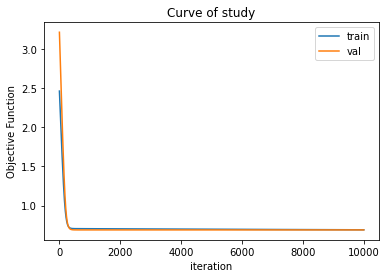

In [ ]:
L = lr.fit(X_train, y_train, X_test, y_test)

In [ ]:
pred = lr.predict(X_test)

In [ ]:
# 各種評価指標
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, pred)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(y_test, pred)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(y_test, pred)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(y_test, pred)
print('F値: {}'.format(f_value))

正解率: 56.00000000000001%
適合率: 0.0%
再現率: 0.0%
F値: 0.0


C:\Users\es\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

<ipython-input-42-352646168202>:39: UserWarning: No contour levels were found within the data range.
  plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)


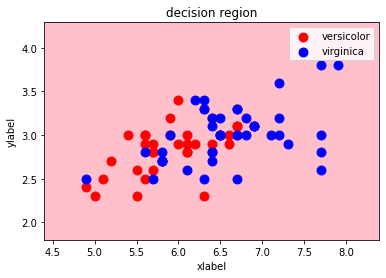

In [ ]:
y_train=y_train.reshape(y_train.shape[0],)
decision_region(X_train, y_train, lr)

In [ ]:
# 【問題8】（アドバンス課題）重みの保存
myfile = open('mydata_coef.pickle', 'rb')
rmydata = pickle.load(myfile)
print(rmydata)

[[0.01980564]
 [0.01791644]]
